# Problem 5

importing Xception Model on 4.3-using-a-pretrained-convnet.ipnb

In [ ]:
import keras
keras.__version__

'2.13.1'

importing Xception Model on 4.3-using-a-pretrained-convnet.ipnb
Image size = 299 by 299 by 3

In [ ]:
from keras.applications import Xception

conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(299, 299, 3))

83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

In [ ]:
import cv2
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

#base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
base_dir = '/content/gdrive/MyDrive/ColabNotebooks/dogs-vs-cats/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 10, 10, 2048))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(299, 299),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 38ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 30ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 31ms/step


In [ ]:
train_features = np.reshape(train_features, (2000, 10 * 10 * 2048))
validation_features = np.reshape(validation_features, (1000, 10 * 10 * 2048))
test_features = np.reshape(test_features, (1000, 10 * 10 * 2048))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=10 * 10 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 5s 39ms/step - loss: 1.6278 - acc: 0.9595 - val_loss: 0.0969 - val_acc: 0.9950
Epoch 2/30
100/100 [==============================] - 2s 17ms/step - loss: 0.5961 - acc: 0.9845 - val_loss: 0.2196 - val_acc: 0.9920
Epoch 3/30
100/100 [==============================] - 2s 19ms/step - loss: 0.0725 - acc: 0.9965 - val_loss: 0.1991 - val_acc: 0.9940
Epoch 4/30
100/100 [==============================] - 2s 17ms/step - loss: 0.1505 - acc: 0.9945 - val_loss: 0.2066 - val_acc: 0.9930
Epoch 5/30
100/100 [==============================] - 2s 17ms/step - loss: 0.1372 - acc: 0.9950 - val_loss: 0.2021 - val_acc: 0.9950
Epoch 6/30
100/100 [==============================] - 2s 17ms/step - loss: 0.0962 - acc: 0.9955 - val_loss: 0.1474 - val_acc: 0.9930
Epoch 7/30
100/100 [==============================] - 2s 17ms/step - loss: 0.1151 - acc: 0.9955 - val_loss: 0.1181 - val_acc: 0.9950
Epoch 8/30
100/100 [==============================] - 2s 17ms/step - 

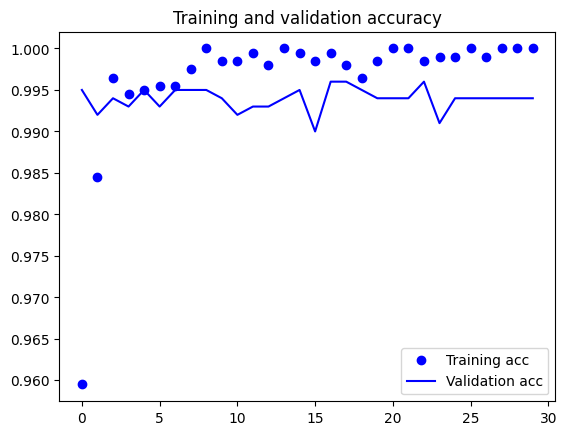

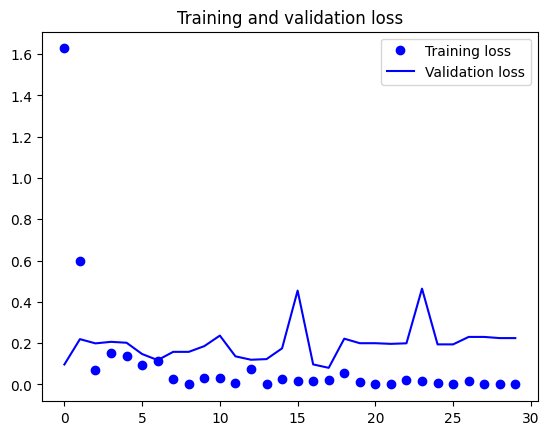

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               52429056  
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 73290793 (279.58 MB)
Trainable params: 73236265 (279.37 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 158


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(299, 299),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(299, 299),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-15-894b33e3f9d7>:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 - 50s - loss: 2.8154 - acc: 0.9550 - val_loss: 0.2890 - val_acc: 0.9930 - 50s/epoch - 501ms/step
Epoch 2/30
100/100 - 47s - loss: 0.7629 - acc: 0.9780 - val_loss: 0.0751 - val_acc: 0.9950 - 47s/epoch - 473ms/step
Epoch 3/30
100/100 - 47s - loss: 0.5175 - acc: 0.9765 - val_loss: 0.2085 - val_acc: 0.9920 - 47s/epoch - 472ms/step
Epoch 4/30
100/100 - 47s - loss: 0.2694 - acc: 0.9840 - val_loss: 0.1299 - val_acc: 0.9900 - 47s/epoch - 466ms/step
Epoch 5/30
100/100 - 46s - loss: 0.2027 - acc: 0.9815 - val_loss: 0.0717 - val_acc: 0.9910 - 46s/epoch - 464ms/step
Epoch 6/30
100/100 - 47s - loss: 0.0887 - acc: 0.9860 - val_loss: 0.0689 - val_acc: 0.9920 - 47s/epoch - 470ms/step
Epoch 7/30
100/100 - 46s - loss: 0.0603 - acc: 0.9890 - val_loss: 0.0305 - val_acc: 0.9940 - 46s/epoch - 464ms/step
Epoch 8/30
100/100 - 47s - loss: 0.0626 - acc: 0.9845 - val_loss: 0.0315 - val_acc: 0.9920 - 47s/epoch - 465ms/step
Epoch 9/30
100/100 - 47s - loss: 0.0735 - acc: 0.9855 - val_loss: 0.0307

In [ ]:
model.save('cats_and_dogs_small_A6_Xception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


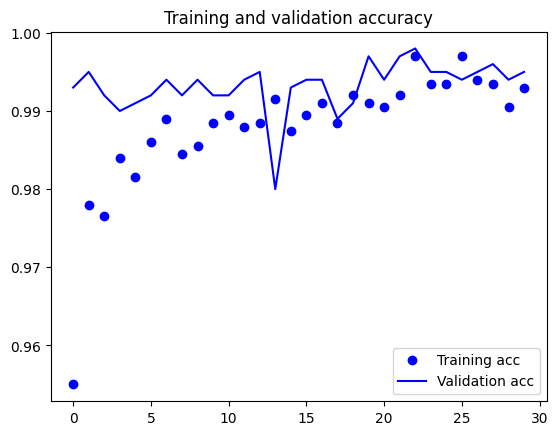

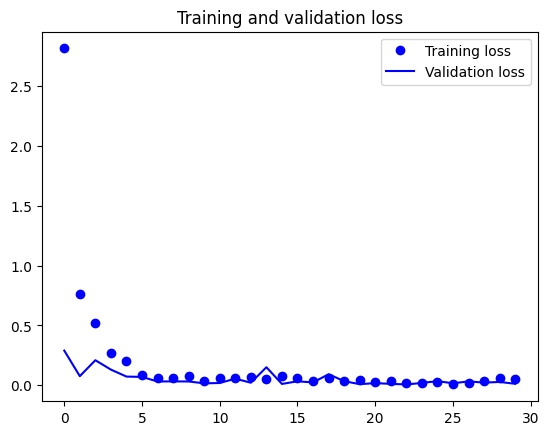

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Fine Tuning**

1) Add your custom network on top of an already trained base network.
2) Freeze the base network.
3) Train the part you added.
4) Unfreeze some layers in the base network.
5) Jointly train both these layers and the part you added.

In [ ]:
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

Fine Tune the last two Separable Convolutional layers in the last block of the Xception Model.

In [ ]:
conv_base.trainable = True

#set_trainable = False
for layer in conv_base.layers:
    set_trainable = False
    if layer.name == 'block14_sepconv1' or layer.name == 'block14_sepconv2' :
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
for layer in conv_base.layers:
   print(layer.name, ':', layer.trainable)

input_1 : False
block1_conv1 : False
block1_conv1_bn : False
block1_conv1_act : False
block1_conv2 : False
block1_conv2_bn : False
block1_conv2_act : False
block2_sepconv1 : False
block2_sepconv1_bn : False
block2_sepconv2_act : False
block2_sepconv2 : False
block2_sepconv2_bn : False
conv2d : False
block2_pool : False
batch_normalization : False
add : False
block3_sepconv1_act : False
block3_sepconv1 : False
block3_sepconv1_bn : False
block3_sepconv2_act : False
block3_sepconv2 : False
block3_sepconv2_bn : False
conv2d_1 : False
block3_pool : False
batch_normalization_1 : False
add_1 : False
block4_sepconv1_act : False
block4_sepconv1 : False
block4_sepconv1_bn : False
block4_sepconv2_act : False
block4_sepconv2 : False
block4_sepconv2_bn : False
conv2d_2 : False
block4_pool : False
batch_normalization_2 : False
add_2 : False
block5_sepconv1_act : False
block5_sepconv1 : False
block5_sepconv1_bn : False
block5_sepconv2_act : False
block5_sepconv2 : False
block5_sepconv2_bn : False
blo

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

<ipython-input-21-a643c9c0098e>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 52s 474ms/step - loss: 0.4514 - acc: 0.9665 - val_loss: 0.0451 - val_acc: 0.9880
Epoch 2/100
100/100 [==============================] - 47s 473ms/step - loss: 0.1072 - acc: 0.9740 - val_loss: 0.0116 - val_acc: 0.9930
Epoch 3/100
100/100 [==============================] - 47s 471ms/step - loss: 0.0536 - acc: 0.9850 - val_loss: 0.0633 - val_acc: 0.9930
Epoch 4/100
100/100 [==============================] - 46s 463ms/step - loss: 0.0277 - acc: 0.9910 - val_loss: 0.1379 - val_acc: 0.9920
Epoch 5/100
100/100 [==============================] - 47s 469ms/step - loss: 0.1349 - acc: 0.9880 - val_loss: 0.0199 - val_acc: 0.9930
Epoch 6/100
100/100 [==============================] - 46s 463ms/step - loss: 0.0403 - acc: 0.9920 - val_loss: 0.0064 - val_acc: 0.9970
Epoch 7/100
100/100 [==============================] - 47s 466ms/step - loss: 0.0348 - acc: 0.9910 - val_loss: 0.0099 - val_acc: 0.9950
Epoch 8/100
100/100 [===========================

In [ ]:
model.save('cats_and_dogs_small_A6_Xception_FineTuned.h5')

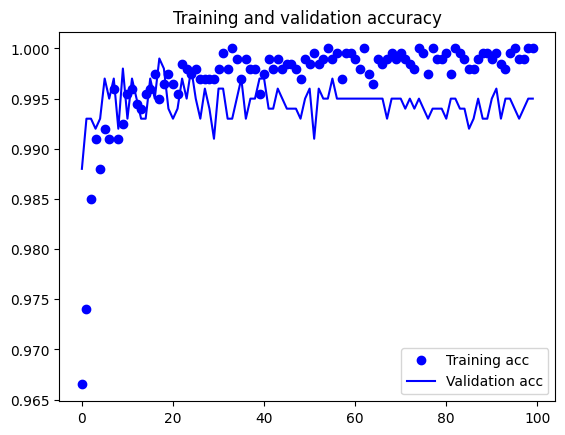

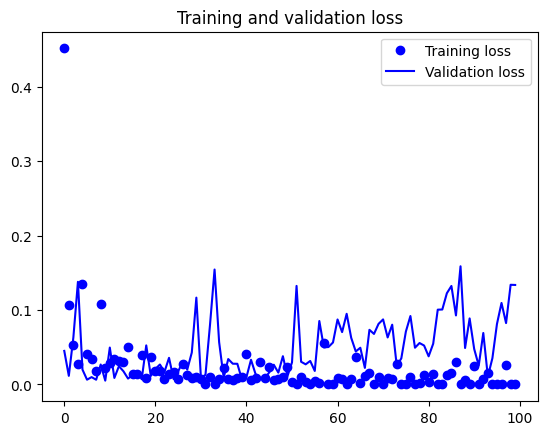

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

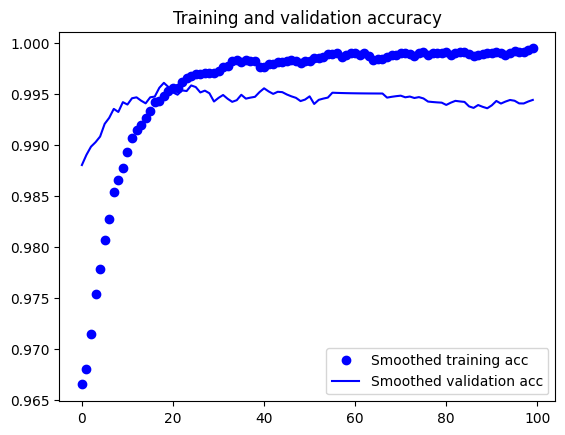

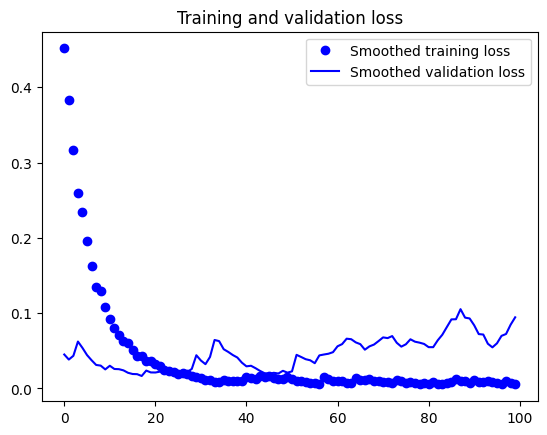

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(299, 299),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


<ipython-input-26-1a4d34cbe021>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9919999837875366


Accuracy is extremel high with Xception model and fine tuning it at 99.19% vs that of VGG16 at 93.19%. A 6% increase is a very high lift in accuracy.